In [4]:
#metebolite = read.table('./LM2021-12432-东部战区总医院-小鼠-肠道组/LM2021-12432-东部战区总医院-小鼠-肠道组织-功能脂质（项目报告）/3.Data/data.txt',check.names = F,header =T,sep = '\t')

In [5]:
metebolite = read.csv('./LM2021-12430-东部战区总医院-小鼠肠道组织//LM2021-12430-东部战区总医院-小鼠肠道组织-LCMS-EMDB(项目报告)/3.数据矩阵/metabolomics_data-new.csv',check.names = F)

In [6]:
cnumber = read.csv('/data/workdirV6/cnumber.csv')

In [7]:
head(cnumber,4)

,Metabolites,kegg
,<chr>,<chr>
1,4-Aminohippuric acid,D06890
2,Imidazolepropionic acid,C20522
3,12S-HHT,C20388
4,Pseudooxynicotine,C20361


In [8]:
count = dplyr::left_join(cnumber,metebolite,by = 'Metabolites')

In [9]:
library(openxlsx)

Warning message:
“package ‘openxlsx’ was built under R version 4.2.3”


In [10]:
wtclpvswtnc <- read.xlsx("./LM2021-12432-东部战区总医院-小鼠-肠道组/LM2021-12432-东部战区总医院-小鼠-肠道组织-功能脂质（项目报告）/4.Analysis/2.差异代谢物/差异代谢物.xlsx", sheet = 2)

In [11]:
koclpvswtclp <- read.xlsx("./LM2021-12432-东部战区总医院-小鼠-肠道组/LM2021-12432-东部战区总医院-小鼠-肠道组织-功能脂质（项目报告）/4.Analysis/2.差异代谢物/差异代谢物.xlsx", sheet = 4)

In [12]:
head(wtclpvswtnc,2)

,ID,Metabolites,P-value,adj.P-value,log2(FC),FC,average(WT-CLP),average(WT-NC),WT-CLP1,WT-CLP2,⋯,WT-CLP7,WT-CLP8,WT-NC1,WT-NC2,WT-NC3,WT-NC4,WT-NC5,WT-NC6,WT-NC7,WT-NC8
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8,Cholic acid,0.01860545,0.09433245,2.414093,5.329844,35841607,6724701,309003.0,32406674,⋯,38017293,23960752,8402380,6064372,2475101,1483138,1959773,4721290,18230762,10460792
2,19,alpha muricholic acid,0.04374990,0.16874961,1.946356,3.853998,19896749,5162625,223382.2,13607679,⋯,18602969,10392519,10290875,5177571,2365926,1445767,3247270,3619858,4122810,11030928


In [13]:
diffkegg = c(wtclpvswtnc$Metabolites,koclpvswtclp$Metabolites)

In [14]:
diffkegg = na.omit(diffkegg)

In [15]:
diffkegg

[1] "Cholic acid"                           
 [2] "alpha muricholic acid"                 
 [3] "12-Ketodeoxycholic acid"               
 [4] "3b,7a,12a-Trihydroxy-5b-cholanoic acid"
 [5] "Palmitoleic acid"                      
 [6] "PG(14:0)"                              
 [7] "Taurolithocholic acid"                 
 [8] "Heptadecanoic acid"                    
 [9] "Erucic acid"                           
[10] "Nervonic acid"                         
[11] "9,10-DHOME"                            
[12] "7alpha-hydroxy-4-cholesterol-3-one"    
[13] "7-ketocholesterol"                     
[14] "Adrenic Acid"                          
[15] "7beta-hydroxycholesterol"              
[16] "PE(14:0)"                              
[17] "Erucic acid"                           
[18] "Alpha-Linolenic acid"                  
[19] "Tetracosanoic acid"                    
[20] "Y-Linolenic acid"                      
[21] "LysoPC(20:0)"

In [16]:
library(dplyr)

Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [17]:
diffcount = count %>% filter(Metabolites %in% diffkegg)

In [18]:
dim(diffcount)

[1]  5 34

In [19]:
head(count,6)

,Metabolites,kegg,KO-CLP1,KO-CLP2,KO-CLP3,KO-CLP4,KO-CLP5,KO-CLP6,KO-CLP7,KO-CLP8,⋯,WT-CLP7,WT-CLP8,WT-NC1,WT-NC2,WT-NC3,WT-NC4,WT-NC5,WT-NC6,WT-NC7,WT-NC8
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4-Aminohippuric acid,D06890,1907.6730,2107.0804,1.207031e+03,1977.1614,1654.02225,1380.053,2304.8172,1341.836,⋯,1125.518,1537.9460,1442.4549,1537.9359,1434.8938,1907.736,1878.776,2409.6861,2057.9699,2120.0958
2,Imidazolepropionic acid,C20522,734048.6609,964779.2631,6.639898e+05,753755.7441,760825.48120,789032.203,683587.9318,696858.954,⋯,736643.996,783907.4581,732337.2132,974556.6301,801616.5692,848251.350,1000744.254,920192.0527,874865.7315,1121065.6150
3,12S-HHT,C20388,8121.2157,7071.0040,2.181638e+03,6887.7571,6939.58248,7012.961,8191.0459,4446.119,⋯,7312.666,4782.9763,11598.4550,8154.5026,9892.5839,7945.446,7188.958,8880.8839,11593.4650,5841.0384
4,Pseudooxynicotine,C20361,5778.9815,6973.4561,4.491355e+03,6155.8664,6254.48530,7163.897,4689.2680,3637.688,⋯,5358.344,5133.3199,1815.5285,5109.6919,4718.1680,3427.270,6438.650,3924.4111,4969.0342,5058.0096
5,Beta-Carboline,C20157,946.0127,930.3337,3.395490e-06,631.7714,99.83814,1827.195,845.8039,1357.926,⋯,1854.090,594.3769,366.7199,959.3223,713.3953,336.558,1679.993,121.7157,924.2311,131.2953
6,N-Acetylneuraminic acid,C19910,91495.4606,131007.4654,1.012511e+05,121633.6350,99050.68432,142866.414,99360.6377,115818.014,⋯,128719.280,119616.5741,172019.7697,187352.1406,162104.8981,157945.018,377701.659,175499.6064,212136.2359,160357.1514


In [20]:
pathway = read.csv('/data/workdirV6/KEGG_COMPOUND_PATHWAY_mmu.csv')

In [21]:
pathway = pathway[,c('CLASS2','COMPOUND')]

In [22]:
head(pathway,3)

,CLASS2,COMPOUND
,<chr>,<chr>
1,Carbohydrate metabolism,C00022
2,Carbohydrate metabolism,C00024
3,Carbohydrate metabolism,C00031


In [23]:
colnames(pathway) = c('pathwayname','kegg')

In [24]:
pathway = pathway[,c(2,1)]

In [25]:
dim(diffcount)

[1]  5 34

In [26]:
head(diffcount,2)

,Metabolites,kegg,KO-CLP1,KO-CLP2,KO-CLP3,KO-CLP4,KO-CLP5,KO-CLP6,KO-CLP7,KO-CLP8,⋯,WT-CLP7,WT-CLP8,WT-NC1,WT-NC2,WT-NC3,WT-NC4,WT-NC5,WT-NC6,WT-NC7,WT-NC8
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Palmitoleic acid,C08362,34212.012,29660.826,34916.844,21052.280,33538.830,41162.270,26135.14,26267.7457,⋯,4098.719,26220.4148,20843.941,19350.298,36619.926,27335.337,30918.554,31456.9599,28914.643,41844.778
2,Nervonic acid,C08323,1505.742,1889.994,1010.027,1455.082,1665.572,1253.728,14257.81,499.4739,⋯,1274.174,795.5397,1339.582,1225.249,1207.964,1309.453,1207.331,843.9264,1155.031,1914.679


In [27]:
diffcount = diffcount[,c(2,1,3:34)]

In [28]:
heat = merge(pathway,diffcount,by = 'kegg')

In [29]:
heat = unique(heat)

In [30]:
head(heat,3)

,kegg,pathwayname,Metabolites,KO-CLP1,KO-CLP2,KO-CLP3,KO-CLP4,KO-CLP5,KO-CLP6,KO-CLP7,⋯,WT-CLP7,WT-CLP8,WT-NC1,WT-NC2,WT-NC3,WT-NC4,WT-NC5,WT-NC6,WT-NC7,WT-NC8
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,C00695,Digestive system,Cholic acid,22046.69,3704.86,17266.03,30202.62,6361.703,126.1183,19874.69,⋯,12341.37,30254.47,3199.217,1805.091,1757.991,2709.026,540.7049,3.395490e-06,3.39549e-06,1257.009
2,C00695,Lipid metabolism,Cholic acid,22046.69,3704.86,17266.03,30202.62,6361.703,126.1183,19874.69,⋯,12341.37,30254.47,3199.217,1805.091,1757.991,2709.026,540.7049,3.395490e-06,3.39549e-06,1257.009
3,C06427,Lipid metabolism,Alpha-Linolenic acid,233813.50,364206.62,420593.63,425913.71,254443.409,155631.8909,317786.83,⋯,79980.40,202156.00,120617.904,207075.204,378031.339,228677.942,318340.8990,2.357947e+05,2.11034e+05,248991.549


In [31]:
heat <- heat[!duplicated(heat$kegg), ]

In [41]:
zhu = data.frame(table(heat$pathwayname))

In [43]:
zhu

Var1,Freq
<fct>,<int>
Digestive system,1
Lipid metabolism,4


In [44]:


zhu$ID <- as.numeric(rownames(zhu))

In [33]:
number_of_bar <- nrow(zhu)
angle <-  90 - 360 * (zhu$ID-0.5) /23
zhu$hjust<-ifelse(angle < -90, 1, 0)
zhu$angle<-ifelse(angle < -90, angle+180, angle)

In [34]:
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


In [35]:
p1 <- ggplot(zhu, aes(x=ID, y=Freq))+
  geom_bar(stat="identity", fill="blue", alpha=0.7) +
  ylim(-75,75) +#y轴范围，控制内圆大小与条形大小
  theme_minimal() +#主题
  theme(axis.text = element_blank(),
        axis.title = element_blank(),
        panel.grid = element_blank(),
        plot.margin = unit(rep(-1,4), "cm")) +#调整边缘以使得标签不会被截断
  coord_polar(start = 0) +#极坐标
  geom_text(data=zhu, aes(x=ID, y=Freq+10, label=Var1, hjust=hjust), 
            color="black", fontface="bold",alpha=0.6, size=6, 
            angle= zhu$angle, inherit.aes = F) #标签


In [36]:
options(repr.plot.height = 16,repr.plot.width = 16 )

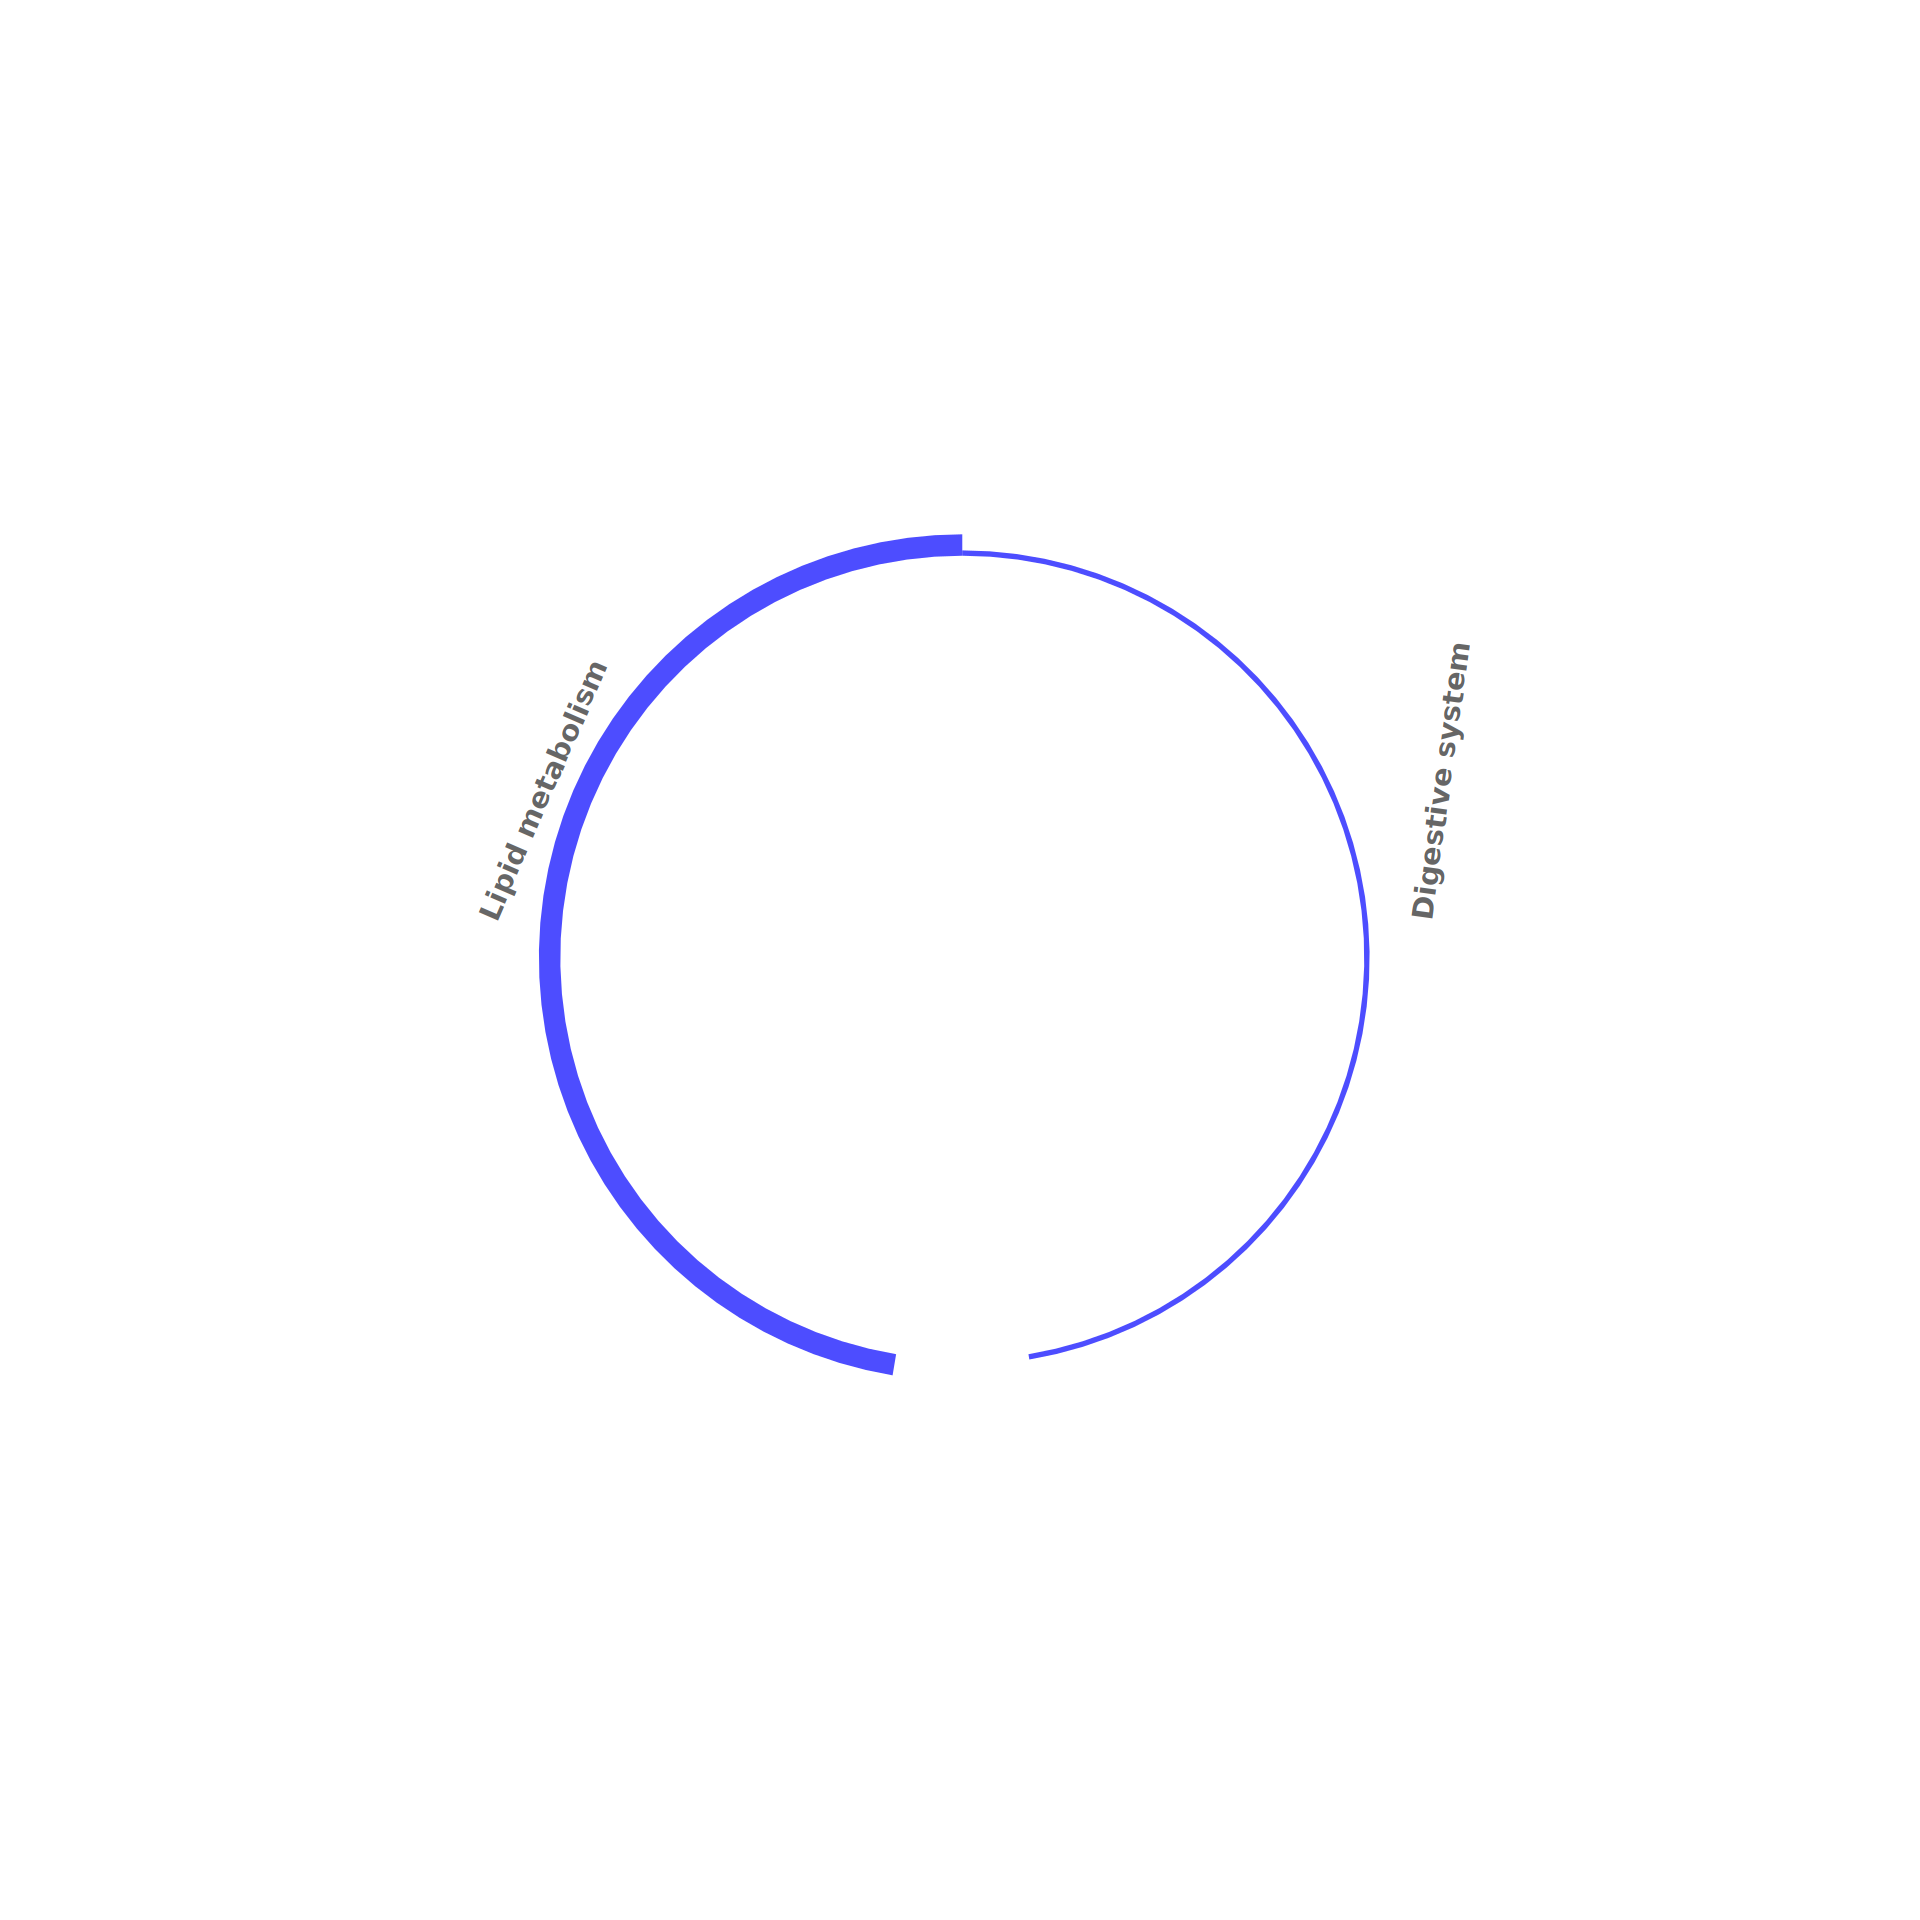

In [37]:
p1

In [151]:
ggsave('./zhuzi.pdf',height = 16,width = 16)

In [28]:
dim(heat1)

[1] 433  35

In [26]:
library(dplyr)

Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [69]:
heat1 = heat %>% filter(pathwayname	 %in% c('Amino acid metabolism ',
                                           'Carbohydrate metabolism ',
                                           'Lipid metabolism ',
                                           'Metabolism of cofactors and vitamins',
                                           'Membrane transport ',
                                           'Nervous system '))

In [70]:
table(heat1$pathwayname)


Metabolism of cofactors and vitamins 
                                  60 

In [50]:
dim(heat1)

[1] 302  35

In [71]:
matrix = as.matrix(heat1[1:60,4:35])

In [72]:
matrixraw = matrix

In [73]:
library(matrixStats)
matrix = (matrix - rowMeans(matrix))/rowSds(matrix)

In [74]:
#matrix <- as.data.frame(t(apply(matrixraw, 1, function(x)(2*(x-min(x))/(max(x)-min(x)))- 1)))

In [75]:
# matrix= scale(matrixraw, center = TRUE, scale = TRUE)

In [76]:
rownames(matrix) <- heat1$Metabolites

In [77]:
sample_annotation <- data.frame(
  Type = c(rep('KO_CLP',8),
            rep('KO_NC',8),
           rep('WT_CLP',8),          
           rep('WT_NC',8)
          )
)

In [78]:
rownames(sample_annotation) <- colnames(matrix)

In [79]:
gene_annotation <- data.frame(
  GeneType = heat1$pathwayname
)

In [80]:
gene_annotation$GeneType = gsub(' ','_',gene_annotation$GeneType)

In [81]:
rownames(gene_annotation) <- rownames(matrix)

In [82]:
row_colors <- list(
  PathwayName = c(Amino_acid_metabolism = "#FFC0CB", Carbohydrate_metabolism = "#FFB6C9", Lipid_metabolism = "#FF69B4",
          Metabolism_of_cofactors_and_vitamins = "#1B9E77", Membrane_transport = "#D95F02", Nervous_system = "#7570b3")
)

In [83]:
col_colors <- list(
  Group = c(KO_CLP= "#add8e6", WT_CLP = "#87CEFA", KO_NC = "#4682B4",WT_NC = '#FF69B4')
)

In [84]:
library(ComplexHeatmap)

In [85]:
ha_col = HeatmapAnnotation(df = sample_annotation, col = col_colors)
ha_row = rowAnnotation(GeneType = gene_annotation$GeneType, col = row_colors)

In [86]:
p = Heatmap(matrix, # 表达矩阵a
       top_annotation = ha_col, # 列注释对象
        left_annotation = ha_row,
        
 # 行注释对象
        cluster_rows = TRUE, 
      cluster_columns = TRUE,
        show_row_names = TRUE,
      show_column_names = TRUE,
        column_split = sample_annotation$Type, # 按样本类型分组
        row_split = gene_annotation$GeneType,   # 按基因类型分组
        column_title = "Expression Matrix",
        row_title = "Pathway name ")

In [87]:
pdf('heatmap-all.pdf',height = 14,width = 12)
print(p)
dev.off()

png 
  2

In [88]:
sample_annotation

,Type
,<chr>
KO-CLP1,KO_CLP
KO-CLP2,KO_CLP
KO-CLP3,KO_CLP
KO-CLP4,KO_CLP
KO-CLP5,KO_CLP
KO-CLP6,KO_CLP
KO-CLP7,KO_CLP
KO-CLP8,KO_CLP
KO-NC1,KO_NC
